Vocabulary Size: 1007
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 11, 11)            11077     
                                                                 
 lstm_12 (LSTM)              (None, 11, 50)            12400     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 1007)              51357     
                                                                 
Total params: 97584 (381.19 KB)
Trainable params: 97584 (381.19 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________________________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


web and security optimization of the online testing of e commerce sites detection of
Diversity Score: 0.296
Epoch 1/50
99/99 [==============================] - 2s 18ms/step - loss: 1.5008 - accuracy: 0.5863 - val_loss: 1.5377 - val_accuracy: 0.5608
Epoch 2/50
99/99 [==============================] - 1s 14ms/step - loss: 1.4492 - accuracy: 0.5932 - val_loss: 1.7398 - val_accuracy: 0.5253
Epoch 3/50
99/99 [==============================] - 1s 14ms/step - loss: 1.4211 - accuracy: 0.6008 - val_loss: 1.8842 - val_accuracy: 0.5089
Epoch 4/50
99/99 [==============================] - 1s 14ms/step - loss: 1.4044 - accuracy: 0.5961 - val_loss: 2.0498 - val_accuracy: 0.4861
Epoch 5/50
99/99 [==============================] - 1s 14ms/step - loss: 1.3806 - accuracy: 0.6040 - val_loss: 2.1670 - val_accuracy: 0.4658
Epoch 6/50
99/99 [==============================] - 2s 15ms/step - loss: 1.3436 - accuracy: 0.6125 - val_loss: 2.3533 - val_accuracy: 0.4468
Epoch 7/50
99/99 [============================

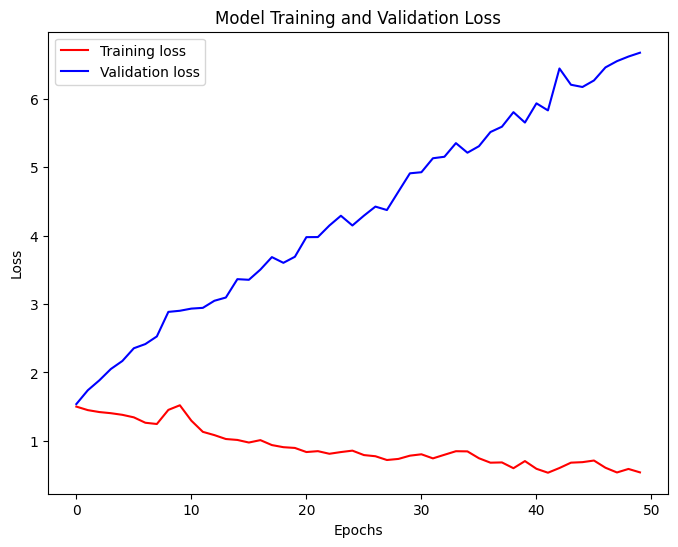

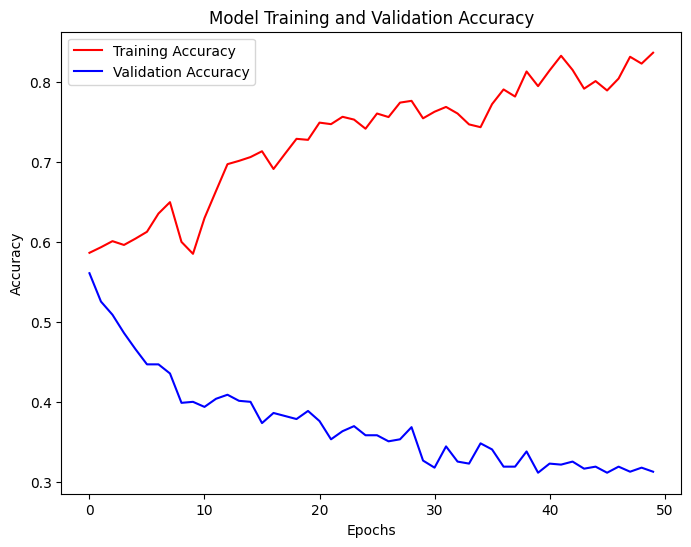

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import os
from matplotlib import pyplot as plt

# Step 1: Load data
df = pd.read_excel('diploma.xlsx')  # Ensure the file path is correct

# Step 2: Text preprocessing
# Combine all text data that the model should learn from
all_text = df['theme'].str.cat(sep=' ') #tema

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([all_text])
encoded = tokenizer.texts_to_sequences([all_text])[0]

# Determine vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size:', vocab_size)

# Create sequences
sequence_length = 11
sequences = []
for i in range(sequence_length, len(encoded)):
    sequence = encoded[i-sequence_length:i+1]
    sequences.append(sequence)

sequences = np.array(sequences)

# Split into X and y
X, y = sequences[:,:-1], sequences[:,-1]
y = np.eye(vocab_size)[y]  # One hot encoding

# Step 3: Model setup
model = Sequential()
model.add(Embedding(vocab_size, 11, input_length=sequence_length))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Summarize the model
model.summary()

# Fit the model
model.fit(X, y, epochs=50, verbose=2, callbacks=[EarlyStopping(monitor='loss', patience=5)])

# Function to generate text
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

model.save('thesis_generator_model.h5')

# Generate a new theme
field1 = 'web'
field2 = 'security'
#seed_text = field1
seed_text = f"{field1} and {field2}"
new_text=generate_text(seed_text, 11, model, sequence_length)
print(new_text)

from collections import Counter

def measure_diversity(texts):
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    total_words = len(all_words)
    unique_words = len(word_counts)
    diversity_score = unique_words / total_words
    return diversity_score

diversity_score = measure_diversity(new_text)
print(f"Diversity Score: {diversity_score:.3f}")

# Function to plot the training and validation loss
def plot_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], 'r', label='Training loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # If accuracy is being tracked, plot that as well
    if 'accuracy' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
        plt.title('Model Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

history = model.fit(X, y, epochs=50, validation_split=0.2)

if 'val_accuracy' in history.history:
    mean_val_accuracy = np.mean(history.history['val_accuracy'])
    print("Mean Validation Accuracy over all epochs:", mean_val_accuracy)

if 'val_loss' in history.history:
    mean_loss_accuracy = np.mean(history.history['val_loss'])
    print("Mean Validation Loss over all epochs:", mean_loss_accuracy)

plot_history(history)


In [ ]:
#!pip install rouge
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from transformers import TrainerCallback
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from nltk.translate.meteor_score import meteor_score

class HistoryCallback(TrainerCallback):
    "A custom callback that records loss and other metrics."
    def __init__(self):
        self.history = {'loss': [], 'perplexity': []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        # Logs might include loss and other metrics like learning rate
        if 'loss' in logs:
            self.history['loss'].append(logs['loss'])
        if 'perplexity' in logs:  # Ensure your perplexity metric is logged appropriately
            self.history['perplexity'].append(logs['perplexity'])

# Initialize the callback
history = HistoryCallback()

def perplexity(labels, logits):
    return tf.exp(tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)))


# Define perplexity metric for Keras
def perplexity(y_true, y_pred):
    cross_entropy = tf.keras.backend.sparse_categorical_crossentropy(y_true, y_pred)
    perplexity = tf.exp(cross_entropy)
    return perplexity

# Load data
df = pd.read_excel('diploma.xlsx')  # Ensure the file path is correct

# Text preprocessing
all_text = df['theme'].str.cat(sep=' ')  # Assuming 'theme' is the correct column name

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([all_text])
encoded = tokenizer.texts_to_sequences([all_text])[0]

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size:', vocab_size)

# Create sequences
sequence_length = 11
sequences = []
for i in range(sequence_length, len(encoded)):
    sequence = encoded[i-sequence_length:i+1]
    sequences.append(sequence)

sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = np.eye(vocab_size)[y]  # One hot encoding

# Model setup
model = Sequential([
    Embedding(vocab_size, 11, input_length=sequence_length),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dense(50, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy', perplexity])

# Model summary
model.summary()
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)  # Make sure vocab_size is correctly set to 1007

# Fit the model
model.fit(X, y, batch_size=32, epochs=50, verbose=2, callbacks=[EarlyStopping(monitor='loss', patience=5)])
#model.fit(X, y, epochs=50, verbose=2, callbacks=[EarlyStopping(monitor='loss', patience=5)])

# Function to generate text
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]
        output_word = tokenizer.index_word.get(predicted_index, 'UNK')
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Example usage
field1 = 'web'
field2 = 'security'
seed_text = f"{field1} and {field2}"
new_theme = generate_text(seed_text, 11, model, sequence_length)
print(new_theme)

from collections import Counter

def measure_diversity(texts):
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    total_words = len(all_words)
    unique_words = len(word_counts)
    diversity_score = unique_words / total_words
    return diversity_score

# Example usage with a list of generated themes
generated_themes = [generate_text(seed_text, 11, model, sequence_length) for _ in range(10)]
diversity_score = measure_diversity(generated_themes)
print(f"Diversity Score: {diversity_score:.3f}")

# Function to plot the training and validation loss
def plot_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], 'r', label='Training loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # If accuracy is being tracked, plot that as well
    if 'accuracy' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
        plt.title('Model Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

# Call to plot function
history = model.fit(X, y, epochs=50, validation_split=0.2)
plot_history(history)

Vocabulary Size: 1007
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11, 11)            11077     
                                                                 
 lstm (LSTM)                 (None, 11, 50)            12400     
                                                                 
 dropout (Dropout)           (None, 11, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 1007)              51357     
                                                                 
Total params: 97584 (381.19 KB)
Tr

In [ ]:
# Assuming `actual_text` is available
#actual_text = "deep learning"
#generated_text = new_theme

# Calculate BLEU Score
#references = [actual_text.split()]  # BLEU expects a list of reference texts
#candidate = generated_text.split()
#bleu_score = sentence_bleu(references, candidate)
#print("BLEU Score:", bleu_score)

# Calculate ROUGE Score
#rouge = Rouge()
#rouge_score = rouge.get_scores(generated_text, actual_text)
#print("ROUGE Score:", rouge_score[0])

# Calculate METEOR Score
#meteor_score = meteor_score([actual_text], generated_text)
#print("METEOR Score:", meteor_score)


NameError: name 'new_theme' is not defined

IndexError: list index out of range

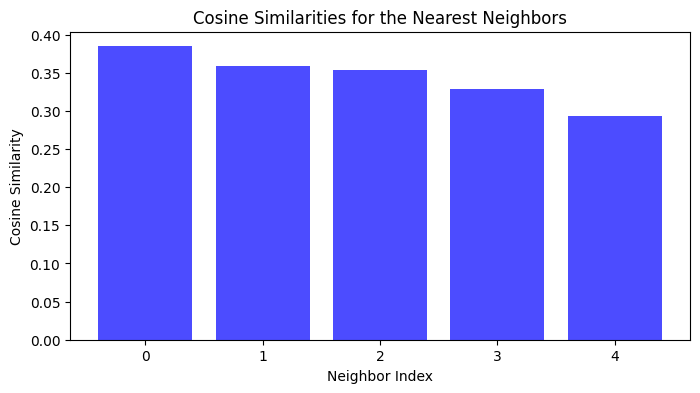

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Sample data loading
df = pd.read_excel('diploma.xlsx')

# Vectorization of the themes
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['theme'])

# Setup k-NN
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)

# Define a function to make recommendations based on user input
def recommend_themes(field1, field2):
    query = f"{field1} and {field2}"
    query_vec = vectorizer.transform([query])
    distances, indices = knn.kneighbors(query_vec)
    similarities = 1 - distances

    # Plotting the similarities
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(similarities[0])), similarities[0], color='blue', alpha=0.7)
    plt.title('Cosine Similarities for the Nearest Neighbors')
    plt.xlabel('Neighbor Index')
    plt.ylabel('Cosine Similarity')
    plt.xticks(range(len(similarities[0])), labels=[titles[i] for i in indices[0]])
    plt.xticks(rotation=45, ha="right")
    plt.show()

    entries = []

    # Fetch the themes that are closest to the query
    for index in indices[0]:
        year = df['year'].iloc[index]
        theme = df['theme'].iloc[index]
        entries.append((year, theme))

    # Sort the list by year in descending order
    entries_sorted = sorted(entries, reverse=True, key=lambda x: x[0])

    # Print the sorted entries
    for entry in entries_sorted:
        print(entry[0], entry[1])

# Example usage
recommend_themes('cloud', 'database')

In [ ]:
!pip install transformers[torch]
!pip install accelerate -U
import matplotlib.pyplot as plt
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments
import tensorflow as tf
from transformers import TrainerCallback

class HistoryCallback(TrainerCallback):
    "A custom callback that records loss and other metrics."
    def __init__(self):
        self.history = {'loss': [], 'perplexity': []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        # Logs might include loss and other metrics like learning rate
        if 'loss' in logs:
            self.history['loss'].append(logs['loss'])
        if 'perplexity' in logs:  # Ensure your perplexity metric is logged appropriately
            self.history['perplexity'].append(logs['perplexity'])

# Initialize the callback
history = HistoryCallback()

def perplexity(labels, logits):
    return tf.exp(tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)))


# Load tokenizer and model
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Prepare dataset
train_path = 'thesis_topics.txt'
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=train_path,
    block_size=128
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False,
)

# Setup training arguments
training_args = TrainingArguments(
    output_dir='/content',          # output directory
    overwrite_output_dir=False,       # overwrite the content of the output directory
    num_train_epochs=4,              # number of training epochs
    per_device_train_batch_size=4,   # batch size for training
    save_steps=10_000,               # number of updates steps before saving model
    save_total_limit=2,              # number of total save model.
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    compute_metrics=perplexity,
    callbacks=[history]
)

# Train the model
trainer.train()
trainer.save_model("./gpt2_finetuned")

# Now you can access the history similar to Keras
print(history.history['loss'])
print(history.history['perplexity'])

# Assume 'history' has the perplexity values over epochs or training steps
#plt.plot(history['perplexity'])
#plt.title('Model Perplexity')
#plt.ylabel('Perplexity')
#plt.xlabel('Epoch')
#plt.legend(['Train'], loc='upper left')
#plt.show()

# Save the model
model.save_pretrained('./thesis_topic_generator')
tokenizer.save_pretrained('./thesis_topic_generator')

from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained('./thesis_topic_generator')
tokenizer = GPT2Tokenizer.from_pretrained('./thesis_topic_generator')

# Function to generate text
def generate_text(prompt, max_length=100):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(inputs, max_length=max_length, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Example usage
print(generate_text("Siguria ne sisteme"))



/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Step,Training Loss


[]
[]


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Siguria ne sistemeinschaftliche Naturwissenschaften (NU)
Numerical Algorithms for Machine Learning
Building a web application for the management and management of a hospital
Web Application for Management of Health Care Facilities
Application of Artificial Intelligence in Data Mining
The use of machine learning algorithms in the classification and analysis of medical records
Development and implementation of web applications for managing health care facilities
Design and Implementation of Web Applications for Healthcare Management


Vocabulary Size: 1347
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 11, 50)            67350     
                                                                 
 lstm_6 (LSTM)               (None, 11, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 11, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1347)              68697     
                                                                 
Total params: 178997 (699.21 KB)

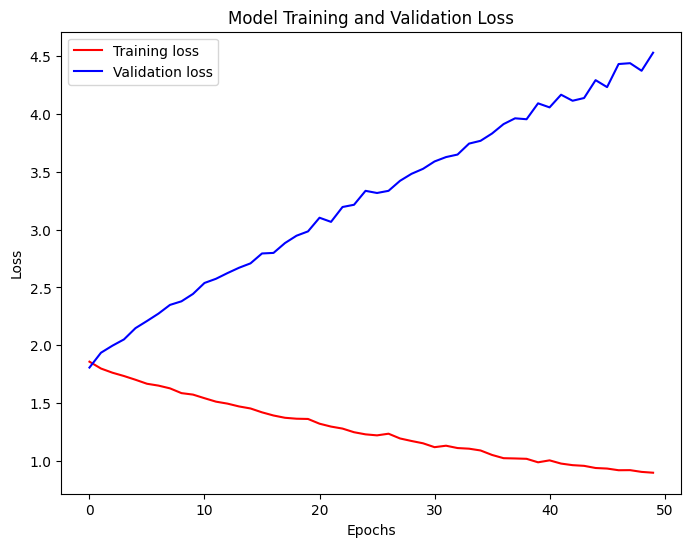

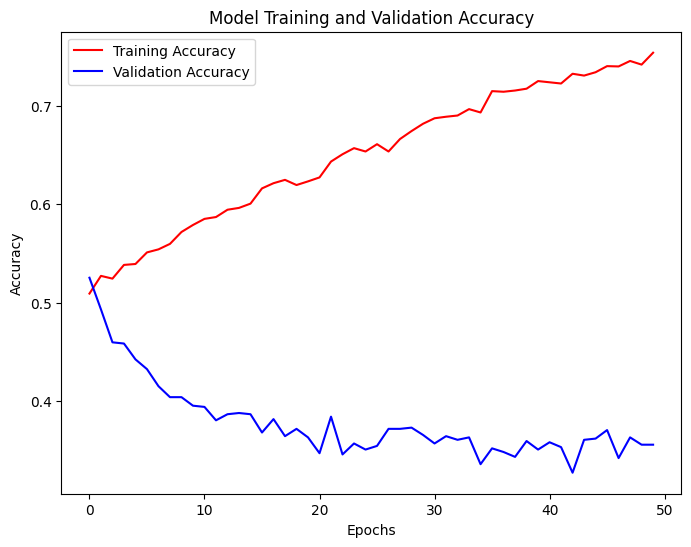

Diversity Score: 0.350


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

# Sample dataset
# Step 1: Load data
df = pd.read_excel('diploma.xlsx')  # Replace with your actual file path

# Step 2: Text preprocessing
# Combine all text data that the model should learn from
texts = df['tema'].tolist()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Including zero index
print('Vocabulary Size:', vocab_size)

# Create input-output pairs
sequence_length = 11  # Length of input sequences
inputs, outputs = [], []
for seq in sequences:
    for i in range(1, len(seq)):
        input_seq, output_seq = seq[:i], seq[i]
        input_seq = pad_sequences([input_seq], maxlen=sequence_length, padding='pre')[0]
        output_seq = to_categorical([output_seq], num_classes=vocab_size)[0]
        inputs.append(input_seq)
        outputs.append(output_seq)

inputs = np.array(inputs)
outputs = np.array(outputs)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=sequence_length))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(inputs, outputs, epochs=50, verbose=1)

# Function to generate text
def generate_text(seed_text, next_words, max_sequence_len, model, tokenizer):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Generate text
new_text = generate_text("web", 11, sequence_length, model, tokenizer)
print(new_text)

#history = model.fit(X, Y, epochs=50, validation_split=0.2)
history = model.fit(inputs, outputs, epochs=50, validation_split=0.2)


if 'val_accuracy' in history.history:
    mean_val_accuracy = np.mean(history.history['val_accuracy'])
    print("Mean Validation Accuracy over all epochs:", mean_val_accuracy)

if 'val_loss' in history.history:
    mean_loss_accuracy = np.mean(history.history['val_loss'])
    print("Mean Validation Loss over all epochs:", mean_loss_accuracy)

# Function to plot the training and validation loss
def plot_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], 'r', label='Training loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # If accuracy is being tracked, plot that as well
    if 'accuracy' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
        plt.title('Model Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

# Call to plot function
plot_history(history)

from collections import Counter

def measure_diversity(texts):
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    total_words = len(all_words)
    unique_words = len(word_counts)
    diversity_score = unique_words / total_words
    return diversity_score

# Example usage with a list of generated themes
#generated_themes = [generate_text("Deep learning", 5, model, sequence_length) for _ in range(10)]
diversity_score = measure_diversity(new_text)
print(f"Diversity Score: {diversity_score:.3f}")


In [ ]:
import pandas as pd
import numpy as np
import string
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load data
df = pd.read_excel('diploma.xlsx')

# Define a clean text function that handles non-string data
def clean_text(data):
    if isinstance(data, str):
        data = "".join(v for v in data if v not in string.punctuation).lower()
        data = data.encode("utf8").decode("ascii", 'ignore')
    else:
        data = ""
    return data

sentence_start = "sentence_start"
sentence_end = "sentence_end"

# Apply text processing to the 'Theme' and 'Field' columns
df['cleaned_theme'] = df['theme'].apply(clean_text)
df['cleaned_field'] = df['field'].apply(clean_text)

# Append special tokens
#df['cleaned_theme'] = sentence_start + " " + df['cleaned_theme'] + " " + sentence_end

# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_theme'].tolist() + df['cleaned_field'].tolist())
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
df['theme_seq'] = tokenizer.texts_to_sequences(df['cleaned_theme'])
df['field_seq'] = tokenizer.texts_to_sequences(df['cleaned_field'])

# Determine maximum sequence length
max_length_theme = max(df['theme_seq'].apply(len))
max_length_field = max(df['field_seq'].apply(len))
max_length = max(max_length_theme, max_length_field)

# Pad sequences
df['theme_seq'] = list(pad_sequences(df['theme_seq'], maxlen=max_length, padding='post'))
df['field_seq'] = list(pad_sequences(df['field_seq'], maxlen=max_length, padding='post'))

# Prepare data for the model
encoder_input_data = np.array(df['field_seq'].tolist())
decoder_input_data = np.array(df['theme_seq'].tolist())
decoder_target_data = np.roll(decoder_input_data, -1, axis=1)
decoder_target_data = to_categorical(decoder_target_data, num_classes=vocab_size)

# Model architecture
embedding_size = 50

# Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(vocab_size, embedding_size)(encoder_inputs)
encoder_outputs, state_h, state_c = LSTM(50, return_state=True)(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(vocab_size, embedding_size)(decoder_inputs)
decoder_lstm = LSTM(50, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define and compile the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=32, epochs=50, validation_split=0.2)

# Define the encoder model for later use in inference
encoder_model = Model(encoder_inputs, encoder_states)


encoder_model.summary()

# Decoder setup for inference (needs defining similar to the training setup but step by step)
decoder_state_input_h = Input(shape=(50,))
decoder_state_input_c = Input(shape=(50,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs,[decoder_outputs] + decoder_states)


# Model to predict
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1 with only the 'sentence_start'.
    target_seq = np.zeros((1, 1))
    #target_seq[0, 0] = tokenizer.word_index['sentence_start']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = tokenizer.index_word.get(sampled_token_index, 'UNK')
        decoded_sentence += ' ' + sampled_char

        # Exit condition: either hit max length or find stop token.
        #sampled_char == 'sentence_end' or
        if (len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence


# Example decoding
test_seq = ['web', 'security', 'network']#encoder_input_data[0:1]  # Simulating a field input
print(decode_sequence(test_seq))


Epoch 1/50
12/12 [==============================] - 5s 102ms/step - loss: 6.7862 - accuracy: 0.5911 - val_loss: 6.0533 - val_accuracy: 0.7086
Epoch 2/50
12/12 [==============================] - 1s 61ms/step - loss: 5.2097 - accuracy: 0.6956 - val_loss: 4.2850 - val_accuracy: 0.7086
Epoch 3/50
12/12 [==============================] - 1s 53ms/step - loss: 3.8472 - accuracy: 0.6956 - val_loss: 3.2616 - val_accuracy: 0.7086
Epoch 4/50
12/12 [==============================] - 1s 59ms/step - loss: 3.0083 - accuracy: 0.6956 - val_loss: 2.6496 - val_accuracy: 0.7086
Epoch 5/50
12/12 [==============================] - 1s 53ms/step - loss: 2.5408 - accuracy: 0.6956 - val_loss: 2.3369 - val_accuracy: 0.7086
Epoch 6/50
12/12 [==============================] - 1s 53ms/step - loss: 2.3062 - accuracy: 0.6956 - val_loss: 2.1818 - val_accuracy: 0.7086
Epoch 7/50
12/12 [==============================] - 1s 59ms/step - loss: 2.1904 - accuracy: 0.6956 - val_loss: 2.0968 - val_accuracy: 0.7086
Epoch 8/50
1

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_5' (type Functional).
    
    Input 0 of layer "lstm_6" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 50)
    
    Call arguments received by layer 'model_5' (type Functional):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=False
      • mask=None
